Example of Dimensionality Reduction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from elections_functions import *
from sklearn.decomposition import PCA
# scikit-learn


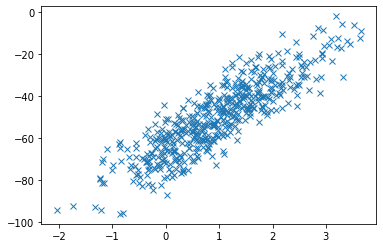

In [37]:
# Example 1: 2D -> 1D
mu = [1.0,-50]
Sigma = [[1,15],[15,300]] # diagonal covariance, points lie on x or y-axis
X = np.random.multivariate_normal(mu,Sigma,500).T
plt.plot(X[0],X[1], 'x');  plt.show() # plt.axis('equal'); 




In [38]:
# Show PCA plot for cities in 2019 september elections
pca = PCA(n_components=2)  # define PCA object
X_pca = pca.fit_transform(X.T)  # fit model. Compute principal components
print(pca.components_)  # Vectors in R^2. The basis B



[[ 0.05037261  0.99873049]
 [ 0.99873049 -0.05037261]]


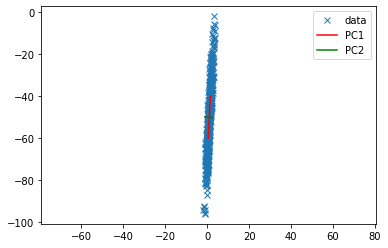

In [39]:
data,=plt.plot(X[0],X[1], 'x');  
PC1,=plt.plot([mu[0]-10*pca.components_[0][0], mu[0]+10*pca.components_[0][0]], [mu[1]-10*pca.components_[0][1], mu[1]+10*pca.components_[0][1]], color="red"); 
PC2,=plt.plot([mu[0]-2*pca.components_[1][0], mu[0]+2*pca.components_[1][0]], [mu[1]-2*pca.components_[1][1], mu[1]+2*pca.components_[1][1]], color="green");  plt.axis('equal'); 
plt.legend([data, PC1, PC2], ['data', 'PC1', 'PC2']); plt.show() 

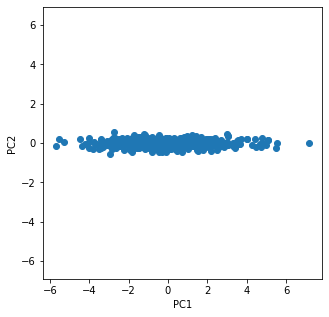

In [17]:
# Next, show the transform data in the PCA space. We show here coordinates after E_B
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:,0],  X_pca[:,1]) #  np.zeros(500)) # X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal');
plt.show(); 


In [18]:
# Show the variance explained by each PC:
print(pca.explained_variance_ )


[3.90883837 0.02937252]


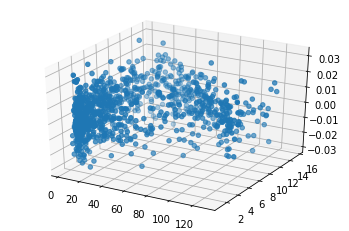

In [19]:
# Example 2: 3D -> 2D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
Axes3D = fig.add_subplot(111, projection='3d')

X = np.zeros([3,1000])

t = (np.random.rand(1000)-0.5)*5
X[0] = t * 3 + t**2 - 0.6 * t**3 + 3*t**4 + 5 +  np.random.randn(1000)*0.3
X[1] = -2*t * 3 + 2*t**2 + 0.6 * t**3 -0.2*t**4 + 0.1*t**5 + 5 + np.random.randn(1000)*0.3
X[2] =  np.random.randn(1000)*0.01


#mu = [0,0, 0]
#Sigma = [[1,0.5, 0.0001],[0.5,3, 0.0001], [0.0001, 0.0001,0.01]] # diagonal covariance, points lie on x or y-axis
#X = np.random.multivariate_normal(mu,Sigma,500).T
#Axes3D.axes.set_zlim3d(bottom=-0.01, top=0.01) 
Axes3D.scatter(X[0], X[1], X[2])


In [22]:
# PCA: 
pca = PCA(n_components=3)  # define PCA object
X_pca = pca.fit_transform(X.T)  # fit model. Compute principal components
print(pca.components_)

[[ 9.99071980e-01  4.30717915e-02 -1.69474029e-06]
 [-4.30717913e-02  9.99071978e-01  5.34763888e-05]
 [ 3.99649140e-06 -5.33537661e-05  9.99999999e-01]]


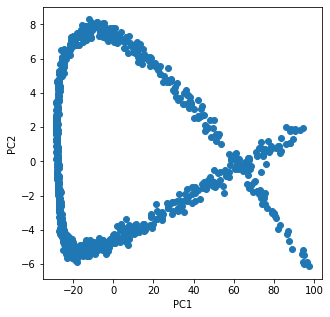

[1.16953281e+03 1.90453516e+01 1.02828684e-04]


In [23]:
# Next, show the transform data in the PCA space
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print(pca.explained_variance_ )



In [27]:
# Example 3: 50D -> 2D

X = np.random.randn(50,1000) * 1  # change noise level

t = (np.random.rand(1000)-0.5)*4
X[17] = t * 3 + t**2 - 0.6 * t**3 + 3*t**4 + 5 +  np.random.randn(1000)*0.3
X[33] = -2*t * 3 + 2*t**2 + 0.6 * t**3 -0.2*t**4 + 0.1*t**5 + 5 + np.random.randn(1000)*0.3
X[42] = X[33]
X[7] = X[33] + np.random.randn(1000)*0.2

X[31] = X[17] + 0.5*X[33]

X[18] = X[17] - 0.5*X[33]

X[40] = -t * 3 + 14*t**2 + 1.6 * t**3 -0.2*t**4 + 0.1*t**5  + np.random.randn(1000)*0.9

#plt.plot(X[0],X[1], 'x');  plt.show() # plt.axis('equal'); 


#import sklearn.datasets
#XS = sklearn.datasets.make_swiss_roll(n_samples=500, noise=0.0, random_state=None)


In [28]:
# Show PCA plot 
pca = PCA(n_components=50)  # define PCA object
X_pca = pca.fit_transform(X.T)  # fit model. Compute principal components
print(pca.components_)


[[ 7.47072692e-05  1.95714513e-03  1.06468082e-03 ... -4.44519534e-04
  -3.03774133e-04  8.02961124e-04]
 [ 3.99284664e-03 -1.20135021e-03 -6.05646832e-03 ... -4.89927346e-03
  -1.66748186e-03  4.95164417e-03]
 [ 3.02357392e-03  1.00793438e-02 -7.21049617e-03 ... -2.67392313e-03
  -7.15504932e-03 -9.35575363e-03]
 ...
 [-3.10890674e-16  3.83062627e-16  8.29616137e-16 ... -1.31107995e-16
  -4.81970641e-16  4.17004908e-16]
 [ 0.00000000e+00  1.52134677e-15 -2.91146771e-16 ...  0.00000000e+00
  -1.24900090e-16  4.16333634e-17]
 [-0.00000000e+00  7.63278329e-16 -1.28428103e-16 ...  1.66533454e-16
  -1.52655666e-16  1.59594560e-16]]


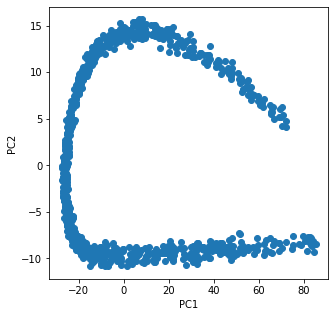

[8.61400392e+02 8.19893574e+01 2.02294129e+01 1.39388330e+00
 1.37075949e+00 1.32911634e+00 1.30616607e+00 1.28340071e+00
 1.27272825e+00 1.24267209e+00 1.22189454e+00 1.20850310e+00
 1.19733904e+00 1.17599365e+00 1.16464509e+00 1.15216879e+00
 1.14338564e+00 1.09690506e+00 1.07519145e+00 1.05906816e+00
 1.04082030e+00 1.02617042e+00 1.01942821e+00 9.87130999e-01
 9.74635910e-01 9.44962863e-01 9.36522129e-01 9.32295721e-01
 9.25240721e-01 9.10751240e-01 8.84553096e-01 8.63536295e-01
 8.56327912e-01 8.41710892e-01 8.28835651e-01 8.08540366e-01
 7.96679653e-01 7.81141439e-01 7.58547801e-01 7.52457257e-01
 7.42229804e-01 7.27403851e-01 7.04409877e-01 6.79464588e-01
 6.54312639e-01 6.42697795e-01 2.77161320e-02 1.69562504e-28
 1.94721863e-29 1.53305915e-30]


In [29]:
# Next, show the transform data in the PCA space
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print(pca.explained_variance_ )



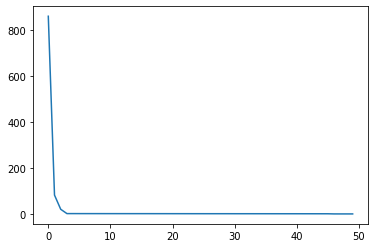

In [30]:
plt.plot(pca.explained_variance_ )


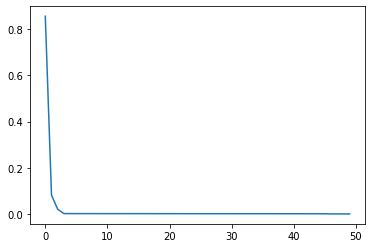

In [31]:
plt.plot(pca.explained_variance_ / sum(pca.explained_variance_ ))


In [32]:
pca.explained_variance_ / sum(pca.explained_variance_)

array([8.55955227e-01, 8.14710786e-02, 2.01015368e-02, 1.38507216e-03,
       1.36209451e-03, 1.32071461e-03, 1.29790941e-03, 1.27528796e-03,
       1.26468296e-03, 1.23481680e-03, 1.21417059e-03, 1.20086379e-03,
       1.18977031e-03, 1.16855985e-03, 1.15728303e-03, 1.14488559e-03,
       1.13615797e-03, 1.08997120e-03, 1.06839485e-03, 1.05237348e-03,
       1.03424097e-03, 1.01968369e-03, 1.01298410e-03, 9.80891054e-04,
       9.68474950e-04, 9.38989475e-04, 9.30602098e-04, 9.26402406e-04,
       9.19392003e-04, 9.04994114e-04, 8.78961576e-04, 8.58077628e-04,
       8.50914812e-04, 8.36390190e-04, 8.23596337e-04, 8.03429345e-04,
       7.91643607e-04, 7.76203614e-04, 7.53752798e-04, 7.47700753e-04,
       7.37537951e-04, 7.22805718e-04, 6.99957095e-04, 6.75169493e-04,
       6.50176537e-04, 6.38635114e-04, 2.75409302e-05, 1.68490649e-31,
       1.93490969e-32, 1.52336823e-33])